In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

# Integración Numérica en Python

## Establecimiento del Problema de Ingretación Numérica en Python

Dada una función $f(X)$, lo que queremos es aproximar la integral de $f(x)$ en un intervalo $[a,b]$. La figura ilustra lo que queremos hacer. Para llevar a cabo esta tarea nosotros asumimos que el intervalo ha sido discretizado en $x$ en una grilla numérica consistente de $n+1$ puntos los cuales han sido espaciados con longitud $h=(b-a)/n$. Nosotros denotamos cada punto en $x$ xomo $x_i$, donde $x_0=a$ y $x_n=b$ (los puntos extremos de nuestro intervalo). Por su puesto, siempre asuminos que la función $f(x)$ tiene valores en todos los puntos del intervalo y que además conocemo explícitamente la función. Normalmente llamamos a $[x_i,x_{i+1}]$ un subintervalo.

<img width="40%" src="../figures/integral.png">

En las siguientes secciones se presentan algunos de los métodos más comunes para aproximar $\int f(x) dx$. Cada método aproxima el área bajo $f(x)$ para cada subintervalo por una forma geométrica para la que es fácil calcular el área exacta, y luego suma las contribuciones de área de cada subintervalo.

## Integral de Riemann

El método más sencillo para aproximar integrales es sumar el área de los rectángulos que se definen para cada subintervalo. La anchura del rectángulo es $x{_i+1}-x_i=h$
y la altura está definida por el valor de una función $f(x)$ para algún $x$ en el subintervalo. Una opción obvia para la altura es el valor de la función en el punto final izquierdo, $x_i$, o en el punto final derecho, $x_{i+1}$, porque estos valores se pueden utilizar aunque no se conozca la función en sí. Este método da la aproximación de la integral de Riemann, que es

- Aproximación por la izquierda: $\int_a^bf(x)dx\approx \sum_{i=0}^{n-1}hf(x_i)$ y $x_i=a+ih$. Error es: $Error=\left[Exact-Numerical\right]\leq\frac{(b-a)^2}{2N}K_1$, con $|f'(x)|\leq K_1$ para todo $x\in [a,b]$.
- Aproximación por la derecha: $\int_a^bf(x)dx\approx \sum_{i=1}^{n}hf(x_i)$ y $x_i=a+ih$. Error es: $Error=\left[Exact-Numerical\right]\leq\frac{(b-a)^2}{2N}K_1$, con $|f'(x)|\leq K_1$ para todo $x\in [a,b]$.
- Aproximación punto medio: $\int_a^bf(x)dx\approx \sum_{i=0}^{n-1}hf(x^*_i)$, $x^*_i=(x_{i+1}+x_i)/2$ y $x_i=a+ih$. Error es: $Error=\left[Exact-Numerical\right]\leq\frac{(b-a)^3}{24N^2}K_2$, con $|f''(x)|\leq K_2$ para todo $x\in [a,b]$.

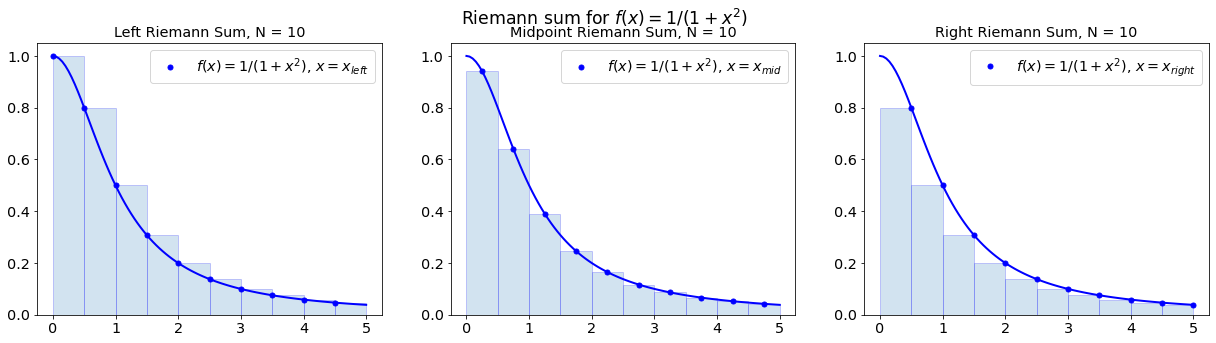

In [2]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly
x = np.linspace(a,b,N+1)
y = f(x)
X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(21,5))
plt.subplot(131)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10,label="$f(x)=1/(1+x^2)$, $x=x_{left}$")
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))
plt.legend()

plt.subplot(132)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10,label="$f(x)=1/(1+x^2)$, $x=x_{mid}$")
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))
plt.legend()

plt.subplot(133)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10,label="$f(x)=1/(1+x^2)$, $x=x_{right}$")
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N))
plt.legend()
plt.suptitle('Riemann sum for $f(x)=1/(1+x^2)$')
plt.show()

In [3]:
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].
    
    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    h = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(h*f(x_left))
    elif method == 'right':
        x_right = x[1:]
        return np.sum(h*f(x_right))
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(h*f(x_mid))
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")
    return

Por ejemplo: integrando la función $f(x)=\frac{1}{1+x^2}$. El valor exacto de esta integral es $F(x)=\int f(x)dx=\arctan(b)-\arctan(a)$.

In [4]:
for i in ['left','right','midpoint']:
    Integral=riemann_sum(lambda x: 1/(1+x**2),0,5,11,i)
    Exact=np.arctan(5)-np.arctan(0)
    Error=Integral-Exact
    print(i+" Riemann sum: \t",Integral,"\t",Exact,"\t",Error,"\t",Error/Exact*100)

left Riemann sum: 	 1.5916810267574106 	 1.373400766945016 	 0.21828025981239474 	 15.893413274985713
right Riemann sum: 	 1.1546180896944735 	 1.373400766945016 	 -0.21878267725054235 	 -15.929995272771047
midpoint Riemann sum: 	 1.3735246729795532 	 1.373400766945016 	 0.0001239060345372689 	 0.00902184107650418


In [5]:
sol,err=[],[]
for i in np.logspace(1,6,6,dtype=int):
    Exact=np.arctan(5)-np.arctan(0)
    sol.append(riemann_sum(lambda x: 1/(1+x**2),0,5,i,method='midpoint'))
    err.append(abs(riemann_sum(lambda x: 1/(1+x**2),0,5,i,method='midpoint')-Exact)/Exact)

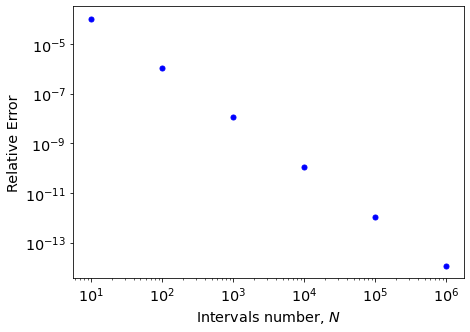

In [6]:
plt.figure(figsize=(7,5))
plt.loglog(np.logspace(1,6,6,dtype=int),err,'b.',markersize=10)
plt.xlabel("Intervals number, $N$")
plt.ylabel("Relative Error")


plt.show()

In [7]:
Rieman=pd.DataFrame(np.array([np.logspace(1,6,6,dtype=int),sol,err]).T,columns=["N","Solucion","Error"])

In [8]:
Rieman

,N,Solucion,Error
0,10.0,1.373543,1.038745e-04
1,100.0,1.373402,1.121944e-06
2,1000.0,1.373401,1.121979e-08
3,10000.0,1.373401,1.121979e-10
4,100000.0,1.373401,1.122186e-12
5,1000000.0,1.373401,1.164060e-14


## Regla del trapecio

La regla del trapecio ajusta un trapecio en cada subintervalo y suma las áreas del trapecio para aproximar la integral total. Esta aproximación para la integral a una función arbitraria se muestra en la siguiente figura. Para cada subintervalo, la regla del trapecio calcula el área de un trapecio con vértices en $(x_i,0),(x_{i+1},0),(x_i,f(x_i))$ y $(x_{i+1},f(x_{i+1}))$, que es $\frac{f(x_i)+f(x_{i+1})}{2}$. Así, la regla del trapecio aproxima las integrales según la expresión

<img width="40%" src="../figures/Trapezoid_integral.png">

$\int_a^bf(x)dx\approx\sum_{i=0}^{n-1}h\frac{f(x_i)+f(x_{i+1})}{2}$

Error es: $Error=\left[Exact-Numerical\right]\leq\frac{(b-a)^3}{12N^2}K_2$, con $|f''(x)|\leq K_2$ para todo $x\in [a,b]$.

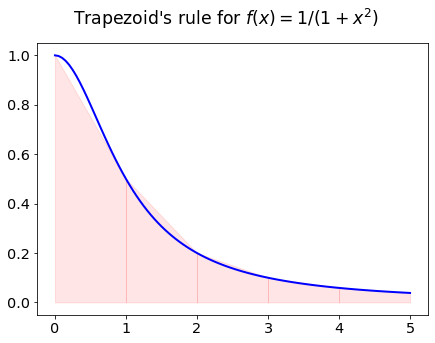

In [9]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 100
n = 10 # Use n*N+1 points to plot the function smoothly
x = np.linspace(a,b,N+1)
y = f(x)

plt.figure(figsize=(7,5))
plt.plot(x,y,'b')

for i in range(5):
    x0 = i; x1 = i+1;
    y0 = f(x0); y1 = f(x1);
    plt.fill_between([x0,x1],[y0,y1],alpha=0.1,color='r')
plt.suptitle("Trapezoid's rule for $f(x)=1/(1+x^2)$")
plt.show()

In [10]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [11]:
sol,err=[],[]
for i in np.logspace(1,6,6,dtype=int):
    Exact=np.arctan(5)-np.arctan(0)
    Num=trapz(lambda x: 1/(1+x**2),0,5,i)
    sol.append(Num)
    err.append(abs(Num-Exact)/Exact)

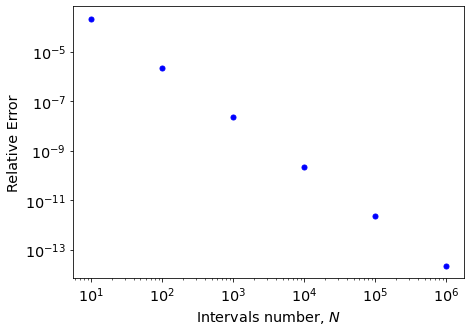

In [12]:
plt.figure(figsize=(7,5))
plt.loglog(np.logspace(1,6,6,dtype=int),err,'b.',markersize=10)
plt.xlabel("Intervals number, $N$")
plt.ylabel("Relative Error")
plt.show()

In [13]:
Trapz=pd.DataFrame(np.array([np.logspace(1,6,6,dtype=int),sol,err]).T,columns=["N","Solucion","Error"])

In [14]:
Trapz

,N,Solucion,Error
0,10.0,1.373104,2.160227e-04
1,100.0,1.373398,2.243918e-06
2,1000.0,1.373401,2.243958e-08
3,10000.0,1.373401,2.243959e-10
4,100000.0,1.373401,2.243888e-12
5,1000000.0,1.373401,2.263450e-14


## Regla del Simpson

La regla de Simpson utiliza un polinomio cuadrático en cada subintervalo de una partición para aproximar la función $f(x)$ y calcular la integral definida. Esto es una mejora sobre la regla del trapecio que aproxima $f(x)$ por una recta en cada subintervalo de una partición.

<img width="40%" src="../figures/Simpson_integral.png">

La fórmula de la regla de Simpson es

$\int_a^bf(x)dx\approx\frac{h}{3}\sum_{i=1}^{N/2}\left[f(x_{2i-2}+f(x_{2i-1})+f(x_{2i}))\right]$, donde $N$ es el número de subintervalos de $[a,b]$ y $h=(b-a)/2$, $x_i=a+ih$.

Error es: $Error=\left[Exact-Numerical\right]\leq\frac{(b-a)^5}{180N^4}K_4$, con $|f^{(4)}(x)|\leq K_4$ para todo $x\in [a,b]$.

In [15]:
def simps(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [16]:
sol,err=[],[]
for i in np.logspace(1,6,6,dtype=int):
    Exact=np.arctan(5)-np.arctan(0)
    Num=simps(lambda x: 1/(1+x**2),0,5,i)
    sol.append(Num)
    err.append(abs(Num-Exact)/Exact)

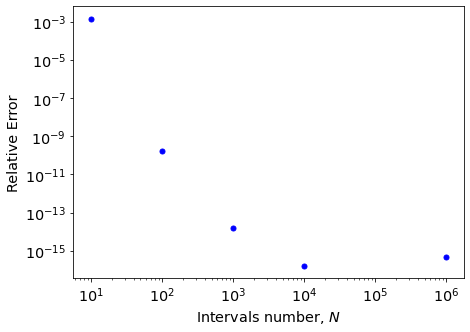

In [17]:
plt.figure(figsize=(7,5))
plt.loglog(np.logspace(1,6,6,dtype=int),err,'b.',markersize=10)
plt.xlabel("Intervals number, $N$")
plt.ylabel("Relative Error")
plt.show()

In [18]:
Simp=pd.DataFrame(np.array([np.logspace(1,6,6,dtype=int),sol,err]).T,columns=["N","Solucion","Error"])

In [19]:
Simp

,N,Solucion,Error
0,10.0,1.371454,1.417473e-03
1,100.0,1.373401,1.592868e-10
2,1000.0,1.373401,1.584415e-14
3,10000.0,1.373401,1.616750e-16
4,100000.0,1.373401,0.000000e+00
5,1000000.0,1.373401,4.850251e-16


## Juntando todo..
Ahora vamos a reunir todos los resultados.... Pero además vamos a usar Scipy en forma...

In [20]:
f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

T = trapz(f,a,b,N)
S = simps(f,a,b,N)
Exact=np.arctan(5)-np.arctan(0)

print(T,S,Exact)

1.3731040812301096 1.371454008759302 1.373400766945016


In [21]:
f = lambda x : 1/(1 + x**2)

S1,S2,T1,T2,E=[],[],[],[],[]
for i in np.logspace(1,7,7,dtype=int):
    a = 0; b = 5; N = 10
    x = np.linspace(a,b,N+1)
    y = f(x)
    Exact=np.arctan(5)-np.arctan(0)
    Num_trapz=trapz(lambda x: 1/(1+x**2),0,5,i)
    Num_simps=simps(lambda x: 1/(1+x**2),0,5,i)
    T = trapz(f,a,b,N)
    S = simps(f,a,b,N)
    E.append(Exact)
    S1.append(Num_simps)
    S2.append(S)
    T1.append(Num_trapz)
    T2.append(T)

In [22]:
Todo=pd.DataFrame(np.array([np.logspace(1,7,7,dtype=int),E,S1,S2,T1,T2]).T,columns=["N","Exact","Solucion Simps","Solucion Simps (scipy)","Solucion Trapz","Solucion Trapz (scipy)"])

In [23]:
Todo

,N,Exact,Solucion Simps,Solucion Simps (scipy),Solucion Trapz,Solucion Trapz (scipy)
0,10.0,1.373401,1.371454,1.371454,1.373104,1.373104
1,100.0,1.373401,1.373401,1.371454,1.373398,1.373104
2,1000.0,1.373401,1.373401,1.371454,1.373401,1.373104
3,10000.0,1.373401,1.373401,1.371454,1.373401,1.373104
4,100000.0,1.373401,1.373401,1.371454,1.373401,1.373104
5,1000000.0,1.373401,1.373401,1.371454,1.373401,1.373104
6,10000000.0,1.373401,1.373401,1.371454,1.373401,1.373104


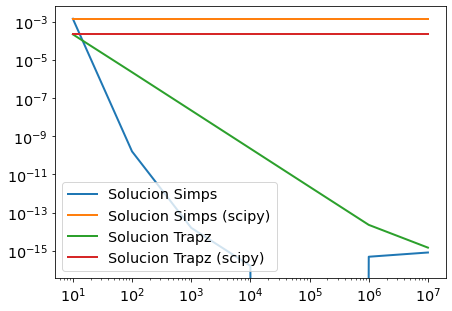

In [24]:
plt.figure(figsize=(7,5))
for i in ["Solucion Simps","Solucion Simps (scipy)","Solucion Trapz","Solucion Trapz (scipy)"]:
    plt.loglog(Todo["N"],abs(Todo[i]-Todo["Exact"])/Todo["Exact"],label=i)
    plt.legend()

# Tarea.

Para analizar algunas cosas.

<img width="40%" src="../figures/multiple_integral.png"> <img width="40%" src="../figures/multiple_integral2.png">

- **Tarea 1.** Integrales múltiples: Las integrales múltiples pueden determinarse numéricamente, primero  integrando en una dimensión, luego en una segunda, y así sucesivamente  para todas las dimensiones del problema. Use este mecanismo para estimar la integral de $T(x,y)=2xy+2x-x^2-2y^2+72$. Haga un pequeño código con una función que permita calcular esta integral doble y además use _**scipy.integrate.dblquad**_ para calcularla desde librerías ya hechas.

- **Tarea 2.** Existe un método para estimar una integral definida similar a regla de Simpson que llamaremos Regla Peculiar de Paul. Requiere que dividir el intervalo en un número de subintervalos divisible por cuatro. Entonces,
    
    $\int_a^bf(x)dx=\frac{2h}{9}\left[-f(a)-f(b)+16\sum_{k=0}^{n/4-1}f(x_{4k+1})-12\sum_{k=0}^{n/4-1}f(x_{4k+2})+16\sum_{k=0}^{n/4-1}f(x_{4k+3})-2\sum_{k=0}^{n/4-1}f(x_{4k})\right]$.
    
    Escriba un programa corto que permita calcula la integral con esta aproximación usando $N$ subintervalos. Para la integral $I=\int_1^4xe^{-x^2}dx$ haga una tabla que compare los errores en la estimación de esta integral además con la regla de Simpson, la del Trapezoide y la de Riemann para una cantidad de $N=12(1,10,10^2,10^3,10^4,10^5,10^6)$. Establezca cual es el orden de error de cada aproximación. Haga un plot con sus resultados. Recuerde que la solución exacta para esta integral es $I=\int_1^4xe^{-x^2}dx=-\frac{1}{2}e^{-x^2}\Big|_1^4=0.18393966431813380117$. Haga la aproximación con 20 dígitos decimales.
    
- **Tarea 3.** Para una malla numérica con espacio $h$, la regla de Boole para aproximar integrales dice que:
    
    $\int_{x_i}^{x_{i+4}}f(x)dx\approx \frac{3h}{90}\left[7f(x_i)+32f(x_{i+1})+12f(x_{i+2})+32f(x_{i+3})+4f(x_{i+4})\right]$.
    
    Demuestre que la regla de Boole es $\mathcal{O}(h^7)$ sobre un único subintervalo.

## Interpolación (Nuevamente)

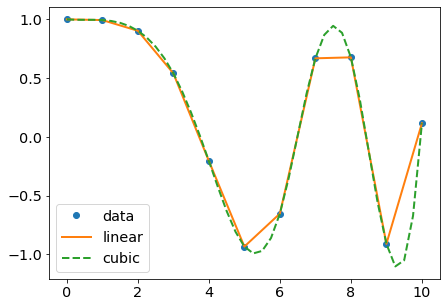

In [25]:
from scipy.interpolate import interp1d
plt.figure(figsize=(7,5))
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')

plt.show()

La interpolación lineal es la técnica para determinar los valores de las funciones de cualquier punto intermedio cuando se conocen los valores de dos puntos adyacentes. La interpolación lineal es básicamente la estimación de un valor desconocido que se encuentra entre dos valores conocidos. La interpolación lineal se utiliza en varias disciplinas como la estadística, la economía, la determinación de precios, etc. Se utiliza para rellenar los huecos en los datos estadísticos en aras de la continuidad de la información. 

Mediante la siguiente fórmula podemos interpolar linealmente el punto de datos dado 

$y(x)=y_1+(x-x_1)\frac{y_2-y_1}{x_2-x_1}$

## Comparación de la mediana, la gaussiana y el filtrado RBF

- **Tarea 4.** Trabajando con datos.... https://ourworldindata.org/working-hours (https://ourworldindata.org/grapher/annual-working-hours-per-worker?time=1950..latest&country=DEU~USA~BRA~CHN~KOR~IND). Este dataset representa las horas de trabajo para varios paises desde 1970 a 2017, más o menos.. Lo que queremos hacer es explorar nuevamente los métodos de interpolación y mirar la tolerancia de los métodos, es decir, hasta donde podemos interpolar cuando hay missing data. Entonces el reto es hacer un pequeño notebook para explorar esto, debemos hacer el ejercicio para varios paises y luego hacer varias pruebas quitando conjuntos de datos (filas en el archivo) y mirar el comportamiento de la estimación en términos de la cantidad de datos borrados. Hay varios métodos diferentes para suavizar una señal ruidosa. Hay muchos métodos pero hay tres métodos de suavizado comunes, a saber, un **filtro de mediana**, **un filtro gaussiano** y un suavizado de **función de base radial (RBF)**. La RBF es una potente herramienta no sólo para el suavizado de datos multivariantes, sino también para la interpolación, la regresión, etc. La siguiente figura muestra el magnífico rendimiento de RBF en comparación con los filtros de mediana y gaussiano. Ahora explore la interpolación de estos datos como antes pero ambién usando los filtros mencionados y saque conclusiones sobre su rentabilidad y rendimiento.

In [26]:
from scipy.interpolate import Rbf

In [27]:
# Aquí cargamos la función para hacer la interpolación usando RBF
rbf = Rbf(x, y, function='quintic', smooth=1E-3)
s = rbf(xnew)

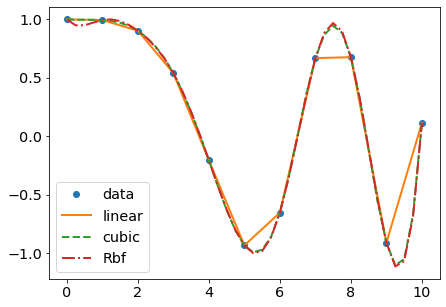

In [28]:
from scipy.interpolate import interp1d
plt.figure(figsize=(7,5))

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f(xnew), '-', label='linear')
plt.plot(xnew, f2(xnew), '--', label='cubic')
plt.plot(xnew, s, '-.', label='Rbf')
plt.legend(loc='best')

plt.show()

In [29]:
# Todos los filtros que queremos usar aquí están en
from scipy.interpolate import Rbf
from scipy.signal import gaussian
from scipy.signal import medfilt